# **Covid Single Cell Project**

**Import necessary packages**

In [1]:
import scanpy as sc
import scvi 
import pandas as pd
import numpy as np 
import os

Global seed set to 0
/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad('/home/makpabey/Covid_project/processed_data/integrated.h5ad')

To convert the counts from a dense to a sparse matrix to reduce memory requirement:

In [3]:
from scipy.sparse import csr_matrix

In [4]:
adata.X = csr_matrix(adata.X)

In [5]:
sc.pp.filter_genes(adata, min_cells=10)

In [6]:
adata

AnnData object with n_obs × n_vars = 108822 × 29581
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [7]:
adata.X

<108822x29581 sparse matrix of type '<class 'numpy.float32'>'
	with 95760461 stored elements in Compressed Sparse Row format>

In [8]:
adata.write_h5ad("combined.h5ad")

In [12]:
########################################################

In [2]:
import seaborn as sns

In [3]:
adata = sc.read_h5ad('combined.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 108822 × 29581
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [5]:
adata.obs.groupby('Sample').count()

doublet  n_genes  n_genes_by_counts  total_counts  \
Sample                                                           
C51ctr          5960     5960               5960          5960   
C52ctr          4415     4415               4415          4415   
C53ctr          6928     6928               6928          6928   
C54ctr          4284     4284               4284          4284   
C55ctr          5565     5565               5565          5565   
C56ctr          3904     3904               3904          3904   
C57ctr          4687     4687               4687          4687   
L01cov          2952     2952               2952          2952   
L03cov          3953     3953               3953          3953   
L04cov          3401     3401               3401          3401   
L04covaddon     4386     4386               4386          4386   
L05cov          2696     2696               2696          2696   
L06cov          6306     6306               6306          6306   
L07cov          4753     4753               4753          4753   
L08cov          3767     3767               3767          3767   
L09cov          3368     3368               3368          3368   
L10cov          1501     1501               1501          1501   
L11cov          2888     2888               2888          2888   
L12cov          3648     3648               3648          3648   
L13cov          4732     4732               4732          4732   
L15cov          3905     3905               3905          3905   
L16cov          1773     1773               1773          1773   
L17cov          4341     4341               4341          4341   
L18cov          2633     2633               2633          2633   
L19cov          2429     2429               2429          2429   
L21cov          3257     3257               3257          3257   
L22cov          6390     6390               6390          6390   

             total_counts_mt  pct_counts_mt  total_counts_ribo  \
Sample                                                           
C51ctr                  5960           5960               5960   
C52ctr                  4415           4415               4415   
C53ctr                  6928           6928               6928   
C54ctr                  4284           4284               4284   
C55ctr                  5565           5565               5565   
C56ctr                  3904           3904               3904   
C57ctr                  4687           4687               4687   
L01cov                  2952           2952               2952   
L03cov                  3953           3953               3953   
L04cov                  3401           3401               3401   
L04covaddon             4386           4386               4386   
L05cov                  2696           2696               2696   
L06cov                  6306           6306               6306   
L07cov                  4753           4753               4753   
L08cov                  3767           3767               3767   
L09cov                  3368           3368               3368   
L10cov                  1501           1501               1501   
L11cov                  2888           2888               2888   
L12cov                  3648           3648               3648   
L13cov                  4732           4732               4732   
L15cov                  3905           3905               3905   
L16cov                  1773           1773               1773   
L17cov                  4341           4341               4341   
L18cov                  2633           2633               2633   
L19cov                  2429           2429               2429   
L21cov                  3257           3257               3257   
L22cov                  6390           6390               6390   

             pct_counts_ribo  
Sample                        
C51ctr                  5960  
C52ctr                  4415  
C53ctr                  6928  
C54ctr                  4284

In [6]:
sc.pp.filter_genes(adata, min_cells = 100)

In [7]:
adata

AnnData object with n_obs × n_vars = 108822 × 21306
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [8]:
adata.layers['counts'] = adata.X.copy()

**Normalization**

In [9]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [10]:
adata.obs.head()

Sample  doublet  n_genes  n_genes_by_counts  \
TCCACCAAGAACCCGA-1_15  L08cov    False     2721               2721   
GTGCTGGTCAGACCGC-1_15  L08cov    False     2848               2848   
GTTTACTCATATCGGT-1_15  L08cov    False     2727               2727   
TTGACCCTCTACTTCA-1_15  L08cov    False     2811               2811   
GCACTAAGTTAGGCTT-1_15  L08cov    False     2700               2700   

                       total_counts  total_counts_mt  pct_counts_mt  \
TCCACCAAGAACCCGA-1_15        6982.0              0.0            0.0   
GTGCTGGTCAGACCGC-1_15        6511.0              0.0            0.0   
GTTTACTCATATCGGT-1_15        6215.0              0.0            0.0   
TTGACCCTCTACTTCA-1_15        5986.0              0.0            0.0   
GCACTAAGTTAGGCTT-1_15        6024.0              0.0            0.0   

                       total_counts_ribo  pct_counts_ribo  
TCCACCAAGAACCCGA-1_15               74.0         1.059868  
GTGCTGGTCAGACCGC-1_15               30.0         0.460759  
GTTTACTCATATCGGT-1_15                3.0         0.048270  
TTGACCCTCTACTTCA-1_15                5.0         0.083528  
GCACTAAGTTAGGCTT-1_15                1.0         0.016600

In [11]:
scvi.model.SCVI.setup_anndata(adata, layer = 'counts',
                             categorical_covariate_keys=['Sample'],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [12]:
model = scvi.model.SCVI(adata)

In [13]:
model.train()

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Epoch 74/74: 100%|██████████| 74/74 [2:59:05<00:00, 150.98s/it, loss=2.97e+03, v_num=1]  

`Trainer.fit` stopped: `max_epochs=74` reached.


Epoch 74/74: 100%|██████████| 74/74 [2:59:05<00:00, 145.21s/it, loss=2.97e+03, v_num=1]


In [16]:
adata.obsm['X_scvi'] = model.get_latent_representation()

In [23]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size=1e4)

In [25]:
sc.pp.neighbors(adata, use_rep = 'X_scvi')

In [26]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


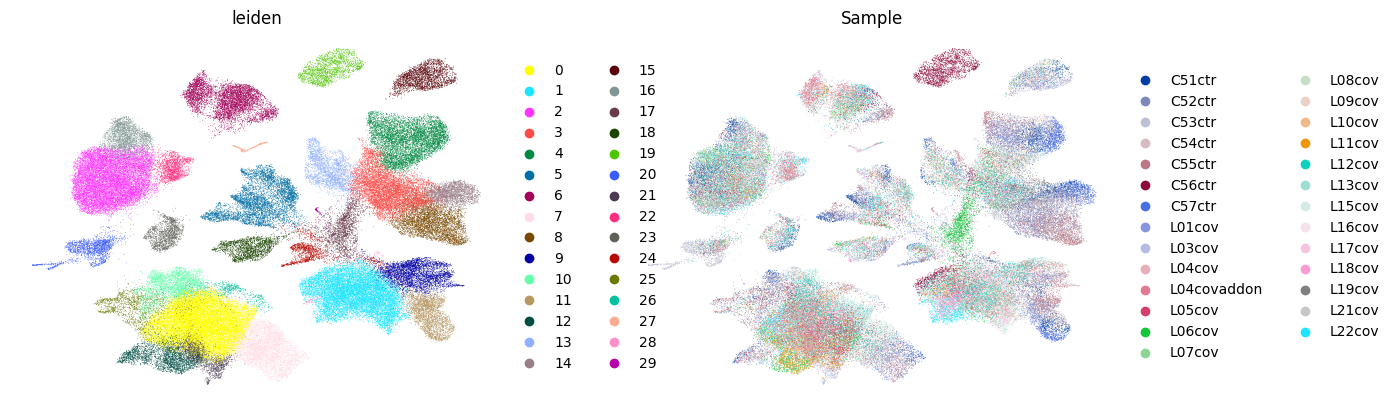

In [42]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

In [28]:
adata.write_h5ad('integrated.h5ad')

**Markers & Labelling Cell Types**

In [45]:
sc.tl.leiden(adata, resolution = 1.2)

In [51]:
sc.tl.rank_genes_groups(adata, 'leiden')

/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.

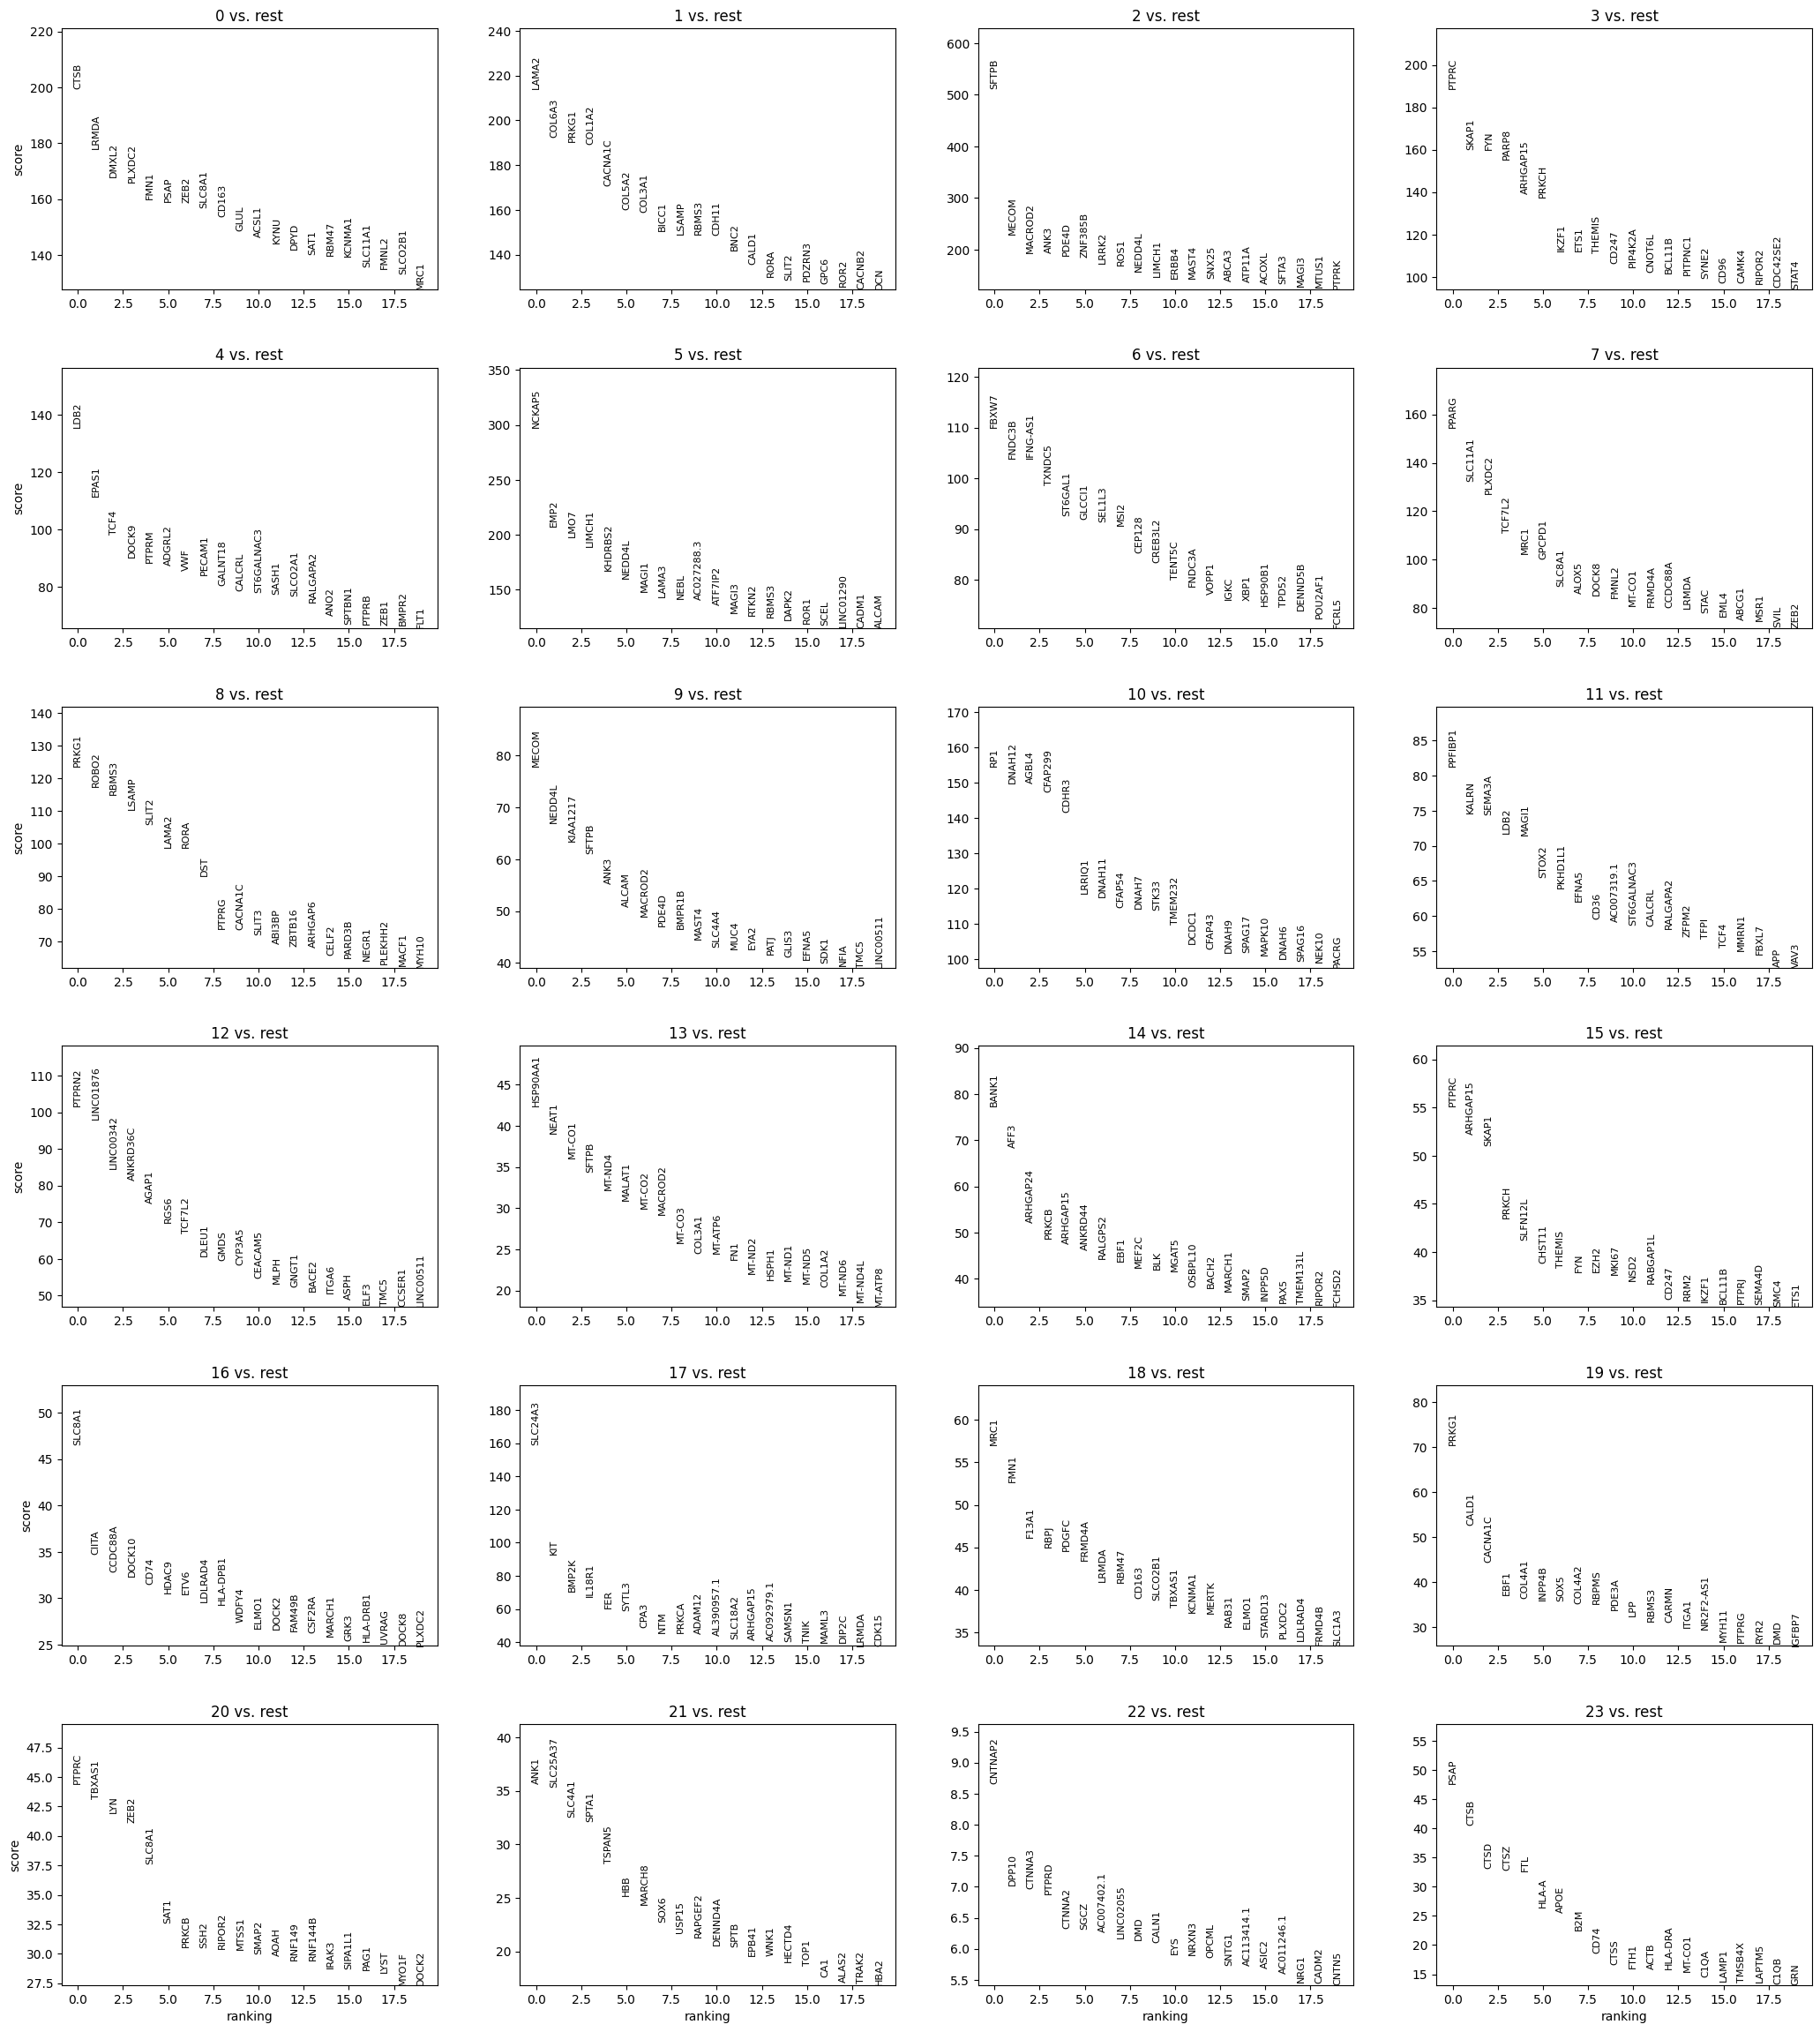

In [30]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [52]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

group      names      scores  logfoldchanges     pvals  pvals_adj
0          0      LRMDA  122.756760        2.640364  0.000000   0.000000
1          0      DMXL2  119.688271        3.643882  0.000000   0.000000
2          0       CTSB  118.739731        3.854756  0.000000   0.000000
3          0     PLXDC2  116.726044        2.811371  0.000000   0.000000
4          0    SLC11A1  107.385353        4.018224  0.000000   0.000000
...      ...        ...         ...             ...       ...        ...
682522    32      SLIT3    2.322894        1.339971  0.023275   0.049239
682523    32     ZSWIM5    2.322421        2.199083  0.023303   0.049289
682524    32    SYNDIG1    2.322397        3.788571  0.023305   0.049289
682525    32  COX10-AS1    2.321599        1.795605  0.023350   0.049374
682526    32       RARB    2.320463        2.145220  0.023415   0.049498

[103182 rows x 6 columns]

In [95]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|██████████| 33/33 [05:09<00:00,  9.38s/it]


proba_de  proba_not_de  bayes_factor        scale1    scale2  \
ACP5       0.9860        0.0140      4.254598  1.149778e-04  0.000024   
CNKSR2     0.9858        0.0142      4.240211  1.812920e-07  0.000022   
PLA2G7     0.9856        0.0144      4.226022  3.378496e-04  0.000032   
CCL18      0.9854        0.0146      4.212025  1.297439e-04  0.000041   
CD300E     0.9854        0.0146      4.212025  5.667417e-05  0.000012   
...           ...           ...           ...           ...       ...   
UBE4B      0.5404        0.4596      0.161953  1.531977e-04  0.000173   
PARG       0.5374        0.4626      0.149880  7.902149e-05  0.000077   
FAM204A    0.5374        0.4626      0.149880  4.112596e-05  0.000043   
PHF2       0.5364        0.4636      0.145858  6.211078e-05  0.000061   
TM9SF4     0.5110        0.4890      0.044007  6.293466e-05  0.000066   

         pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  raw_mean1  \
ACP5              0.0   0.25  6.003881    6.428879  3.846929  ...   0.259135   
CNKSR2            0.0   0.25 -5.878445   -6.211329  4.265249  ...   0.000000   
PLA2G7            0.0   0.25  6.267547    6.827648  3.348610  ...   0.358935   
CCL18             0.0   0.25  6.421542    6.945446  4.361749  ...   0.253600   
CD300E            0.0   0.25  4.571991    4.887790  2.807025  ...   0.065315   
...               ...    ...       ...         ...       ...  ...        ...   
UBE4B             0.0   0.25 -0.133561   -0.160153  0.405323  ...   0.149254   
PARG              0.0   0.25  0.070003    0.062297  0.413038  ...   0.074627   
FAM204A           0.0   0.25 -0.030466   -0.074116  0.436979  ...   0.044776   
PHF2              0.0   0.25  0.072065    0.054309  0.432287  ...   0.059701   
TM9SF4            0.0   0.25 -0.021572   -0.023651  0.414036  ...   0.044776   

         raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
ACP5      0.081512               0.163417               0.031665   
CNKSR2    0.029965               0.000000               0.022404   
PLA2G7    0.036104               0.229158               0.022755   
CCL18     0.118059               0.118624               0.031387   
CD300E    0.016842               0.051861               0.012979   
...            ...                    ...                    ...   
UBE4B     0.245496               0.134328               0.195338   
PARG      0.105103               0.074627               0.093697   
FAM204A   0.067921               0.044776               0.062581   
PHF2      0.076031               0.059701               0.069091   
TM9SF4    0.091799               0.044776               0.082589   

         raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
ACP5                 1.755995              0.328793            True   
CNKSR2               0.000000              0.213752            True   
PLA2G7               2.926094              0.213011            True   
CCL18                1.553941              0.559042            True   
CD300E               0.539295              0.133384            True   
...                       ...                   ...             ...   
UBE4B                2.132715              1.840755           False   
PARG                 1.000206              0.769690           False   
FAM204A              0.683990              0.501176           False   
PHF2                 1.273660              0.579517           False   
TM9SF4               0.517415              0.673340           False   

         comparison  group1 group2  
ACP5      0 vs Rest       0   Rest  
CNKSR2    0 vs Rest       0   Rest  
PLA2G7    0 vs Rest       0   Rest  
CCL18     0 vs Rest       0   Rest  
CD300E    0 vs Rest       0   Rest  
...             ...     ...    ...  
UBE4B    32 vs Rest      32   Rest  
PARG     32 vs Rest      32   Rest  
FAM204A  32 vs Rest      32   Rest  
PHF2     32 vs Rest      32   Rest  
TM9SF4   32 vs Rest      32   Rest  

[703098 rows x 22 columns]

In [98]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

proba_de  proba_not_de  bayes_factor    scale1    scale2  \
ACP5        0.9860        0.0140      4.254598  0.000115  0.000024   
PLA2G7      0.9856        0.0144      4.226022  0.000338  0.000032   
CCL18       0.9854        0.0146      4.212025  0.000130  0.000041   
CD300E      0.9854        0.0146      4.212025  0.000057  0.000012   
APOC1       0.9842        0.0158      4.131819  0.000101  0.000021   
...            ...           ...           ...       ...       ...   
TRIM39      0.8660        0.1340      1.866045  0.000017  0.000010   
ANP32E      0.8660        0.1340      1.866045  0.000029  0.000022   
FKRP        0.8660        0.1340      1.866045  0.000022  0.000014   
MRFAP1L1    0.8660        0.1340      1.866045  0.000011  0.000010   
THEM4       0.8660        0.1340      1.866045  0.000037  0.000025   

          pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  raw_mean1  \
ACP5               0.0   0.25  6.003881    6.428879  3.846929  ...   0.259135   
PLA2G7             0.0   0.25  6.267547    6.827648  3.348610  ...   0.358935   
CCL18              0.0   0.25  6.421542    6.945446  4.361749  ...   0.253600   
CD300E             0.0   0.25  4.571991    4.887790  2.807025  ...   0.065315   
APOC1              0.0   0.25  6.926078    7.473107  4.302324  ...   0.136934   
...                ...    ...       ...         ...       ...  ...        ...   
TRIM39             0.0   0.25  0.967454    0.885637  0.860190  ...   0.014925   
ANP32E             0.0   0.25  0.773525    0.789577  1.155155  ...   0.059701   
FKRP               0.0   0.25  0.882118    0.881501  0.924055  ...   0.000000   
MRFAP1L1           0.0   0.25  0.674578    0.595470  1.453940  ...   0.000000   
THEM4              0.0   0.25  1.033737    0.964561  1.212790  ...   0.029851   

          raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
ACP5       0.081512               0.163417               0.031665   
PLA2G7     0.036104               0.229158               0.022755   
CCL18      0.118059               0.118624               0.031387   
CD300E     0.016842               0.051861               0.012979   
APOC1      0.051030               0.085157               0.024990   
...             ...                    ...                    ...   
TRIM39     0.012376               0.014925               0.012055   
ANP32E     0.031117               0.059701               0.028670   
FKRP       0.015254               0.000000               0.014776   
MRFAP1L1   0.014427               0.000000               0.014022   
THEM4      0.028230               0.029851               0.026767   

          raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
ACP5                  1.755995              0.328793            True   
PLA2G7                2.926094              0.213011            True   
CCL18                 1.553941              0.559042            True   
CD300E                0.539295              0.133384            True   
APOC1                 0.837080              0.220649            True   
...                        ...                   ...             ...   
TRIM39                0.299106              0.096542            True   
ANP32E                0.656415              0.235280            True   
FKRP                  0.000000              0.110687            True   
MRFAP1L1              0.000000              0.106703            True   
THEM4                 0.231776              0.230211            True   

          comparison  group1 group2  
ACP5       0 vs Rest       0   Rest  
PLA2G7     0 vs Rest       0   Rest  
CCL18      0 vs Rest       0   Rest  
CD300E     0 vs Rest       0   Rest  
APOC1      0 vs Rest       0   Rest  
...              ...     ...    ...  
TRIM39    32 vs Rest      32   Rest  
ANP32E    32 vs Rest      32   Rest  
FKRP      32 vs Rest      32   Rest  
MRFAP1L1  32 vs Rest      32   Rest  
THEM4     32 vs Rest      32   Rest  

[109603 rows x 22 columns]

/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


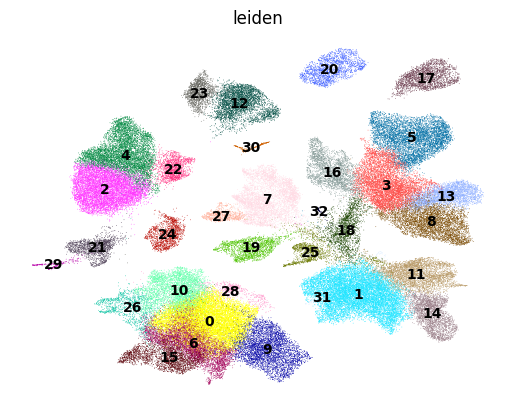

In [46]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc= 'on data')

In [4]:
cell_type = { "0":"Macrophages",
"1":"Fibroblasts",
"2":"CD4+ T-cell",
"3":"AT2",
"4":"CD8+ T-cell",
"5":"AT1",
"6":"Macrophages",
"7":"Endothelial cells",
"8":"AT2",
"9":"Macrophages",
"10":"Macrophages",
"11":"Fibroblasts",
"12":"Plasma Cells",
"13":"AT2",
"14":"Smooth Muscle cell",
"15":"Monocytes",
"16":"Luminal epithelial cells",
"17":"Airway Epithelial",
"18":"Fibroblasts",
"19":"Endothelial cells",
"20":"Airway goblet cells",
"21":"B Cells",
"22":"Erythroid-like cells",
"23":"Plasma Cells",
"24":"Neurons",
"25":"Smooth Muscle",
"26":"Dendrytic Cells",
"27":"Endothelial cells",
"28":"Macrophages",
"29":"B Cells",
"30":"Erythroid-like cells",
"31":"Fibroblasts",
"32":"Fibroblasts"
}

In [5]:
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)

/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


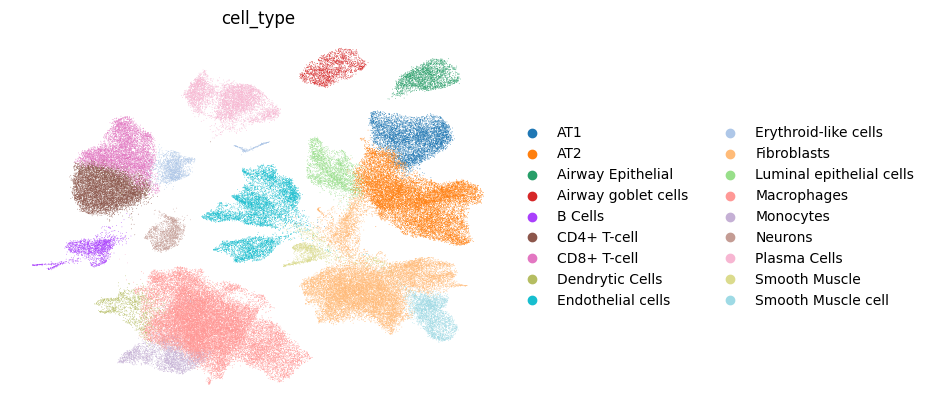

In [6]:
sc.pl.umap(adata, color = ['cell_type'], frameon = False)

In [147]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [148]:
adata.write_h5ad('integrated.h5ad')

In [149]:
model.save('model.model')

In [3]:
adata = sc.read_h5ad('integrated.h5ad')

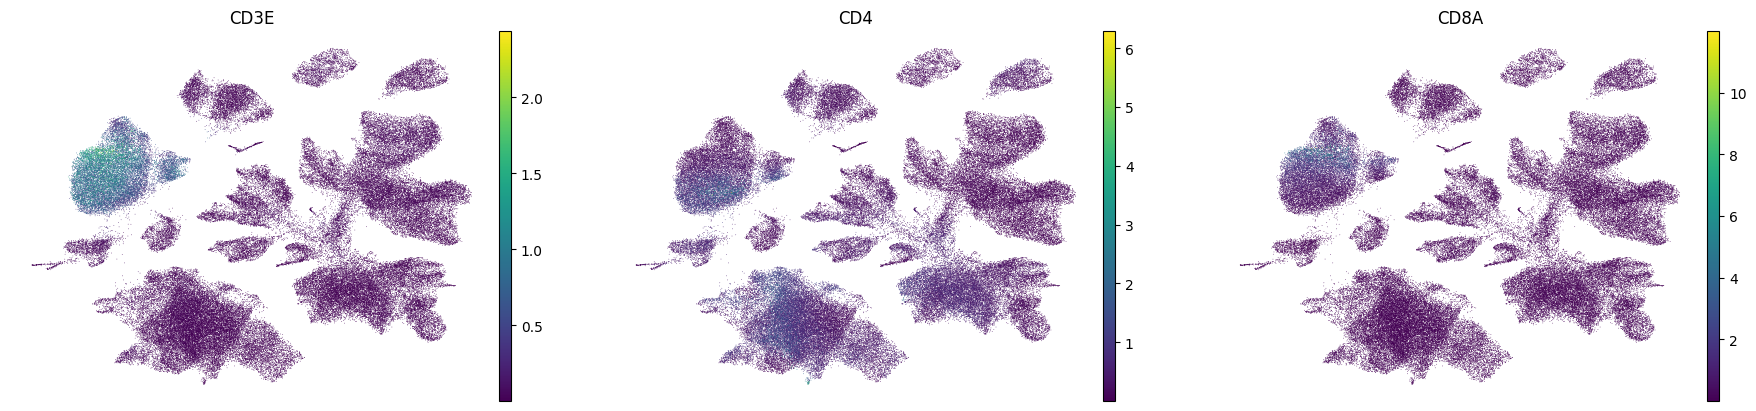

In [43]:
sc.pl.umap(adata, color = ['CD3E', 'CD4', 'CD8A'], frameon=False, layer = "scvi_normalized")

In [58]:
markers[markers.names == 'CD8A']

group names     scores  logfoldchanges         pvals     pvals_adj
43524      2  CD8A  10.052368        2.040397  1.231817e-23  3.267161e-23
85521      4  CD8A  20.132811        4.693548  2.498959e-87  1.248366e-86
469812    22  CD8A   9.024100        3.172164  5.123511e-19  1.577023e-18

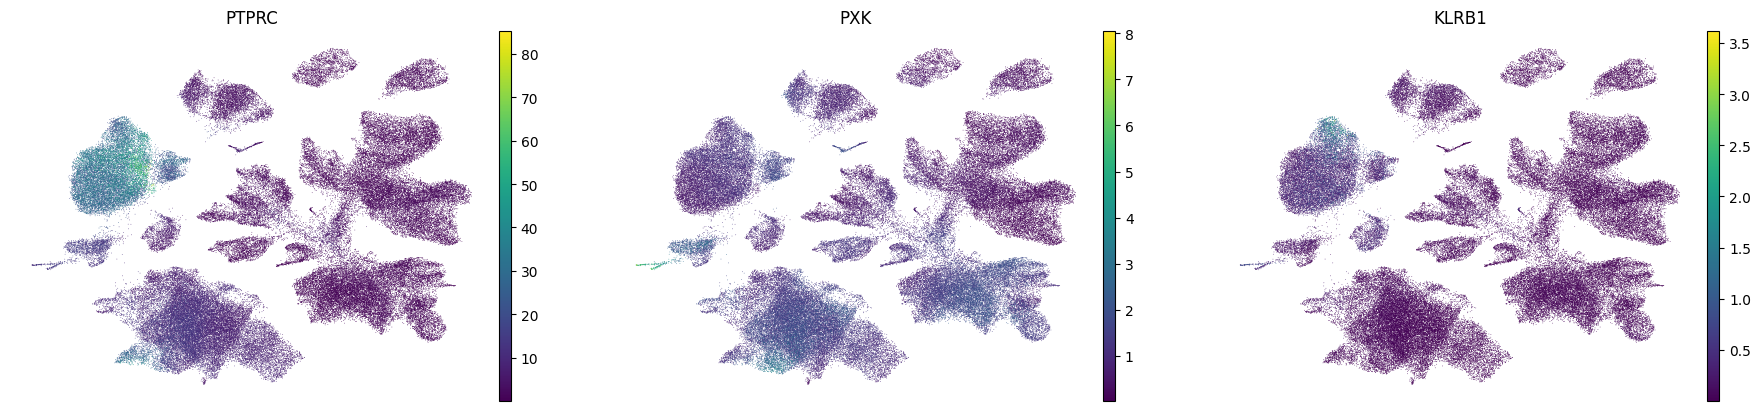

In [72]:
sc.pl.umap(adata, color = ['PTPRC', 'PXK', 'KLRB1'], frameon=False, layer = "scvi_normalized")

In [73]:
markers[markers.names == 'PXK']

group names     scores  logfoldchanges         pvals     pvals_adj
1094       0   PXK  16.046560        0.780634  2.024719e-57  8.679811e-57
22404      1   PXK  19.259293        0.910205  1.458215e-81  8.599148e-81
130073     6   PXK  11.920790        0.779195  2.373600e-32  7.972870e-32
235553    11   PXK   9.764995        0.767721  2.827018e-22  1.219774e-21
320016    15   PXK  11.627076        1.163340  1.525323e-30  5.902385e-30
447714    21   PXK  10.102706        1.367519  2.608716e-23  8.350556e-23
469835    22   PXK   8.918403        1.094476  1.261875e-18  3.856766e-18
598432    28   PXK   5.480678        0.949212  6.097367e-08  1.916367e-07
618023    29   PXK  10.070602        2.883610  6.814514e-20  1.691206e-19
660853    31   PXK   4.072880        1.771115  8.518979e-05  2.065377e-04

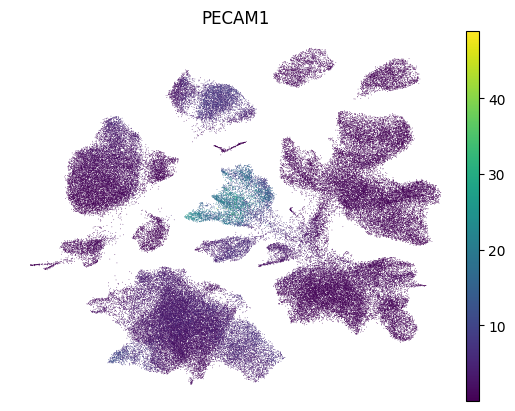

In [74]:
sc.pl.umap(adata, color = ['PECAM1'], frameon=False, layer = "scvi_normalized")

In [76]:
markers[markers.names == 'PECAM1']

group   names     scores  logfoldchanges          pvals      pvals_adj
956        0  PECAM1  17.792862        0.738619   4.658887e-70   2.206808e-69
130019     6  PECAM1  12.099545        0.675231   2.840593e-33   9.685017e-33
149150     7  PECAM1  75.468063        4.329918   0.000000e+00   0.000000e+00
191885     9  PECAM1  40.970482        2.383290   0.000000e+00   0.000000e+00
213552    10  PECAM1  14.942102        1.023115   3.102802e-49   1.882891e-48
255996    12  PECAM1  17.221611        1.294258   4.615737e-64   2.425226e-63
319747    15  PECAM1  18.865255        1.668438   9.224365e-75   6.424790e-74
404997    19  PECAM1  22.250349        2.058484   8.638777e-98   1.303525e-96
491985    23  PECAM1   6.940922        0.748872   5.660961e-12   1.355501e-11
575280    27  PECAM1  34.094669        4.434055  2.434478e-154  2.828189e-153
597940    28  PECAM1   6.469907        0.975947   1.946777e-10   6.773031e-10

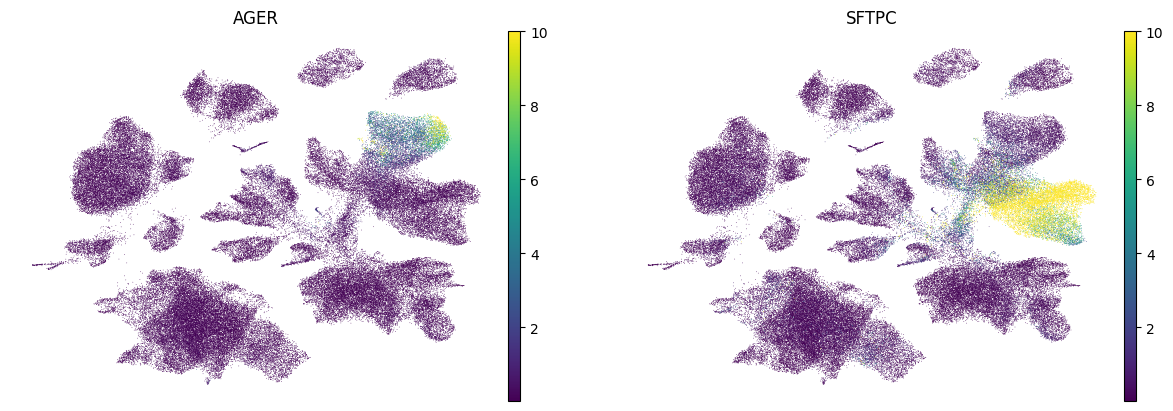

In [86]:
sc.pl.umap(adata, color = ['AGER', 'SFTPC'], frameon=False, layer = "scvi_normalized", vmax = 10)

In [85]:
markers[markers.names == 'AGER']

group names     scores  logfoldchanges         pvals     pvals_adj
65080      3  AGER  14.810447        1.800995  7.977057e-49  4.919224e-48
106673     5  AGER  51.131271        6.400085  0.000000e+00  0.000000e+00

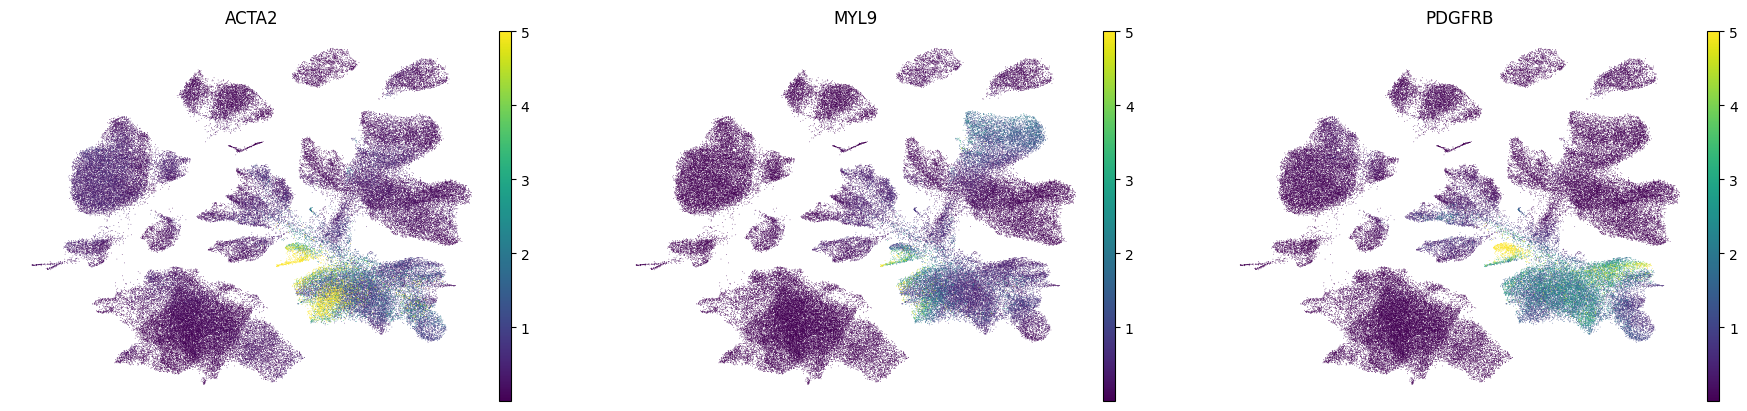

In [88]:
sc.pl.umap(adata, color = ['ACTA2', 'MYL9', 'PDGFRB'], frameon=False, layer = "scvi_normalized", vmax = 5)

In [136]:
markers_scvi[markers_scvi.group1 == "32"][0:20]

proba_de  proba_not_de  bayes_factor    scale1    scale2  \
AC017083.1    1.0000        0.0000     18.420681  0.000014  0.000001   
AL353595.1    1.0000        0.0000     18.420681  0.000041  0.000002   
AC009435.1    0.9998        0.0002      8.516943  0.000028  0.000002   
LINC00466     0.9998        0.0002      8.516943  0.000015  0.000001   
AC025419.1    0.9998        0.0002      8.516943  0.000052  0.000001   
AC010255.3    0.9998        0.0002      8.516943  0.000026  0.000003   
GABRA3        0.9996        0.0004      7.823621  0.000034  0.000002   
PPP1R42       0.9996        0.0004      7.823621  0.000111  0.000011   
NOL4          0.9996        0.0004      7.823621  0.000087  0.000003   
CDHR4         0.9996        0.0004      7.823621  0.000083  0.000009   
FABP6         0.9996        0.0004      7.823621  0.000055  0.000008   
DNAI1         0.9996        0.0004      7.823621  0.000129  0.000015   
RIT2          0.9996        0.0004      7.823621  0.000052  0.000001   
LINC01492     0.9996        0.0004      7.823621  0.000019  0.000001   
ERICH3        0.9996        0.0004      7.823621  0.000167  0.000021   
AL355838.1    0.9996        0.0004      7.823621  0.000031  0.000002   
TMEM225B      0.9996        0.0004      7.823621  0.000015  0.000001   
SNAP91        0.9994        0.0006      7.417964  0.000080  0.000002   
BVES-AS1      0.9994        0.0006      7.417964  0.000023  0.000001   
CCDC187       0.9994        0.0006      7.417964  0.000052  0.000007   

            pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  \
AC017083.1           0.0   0.25  4.233550    4.100945  1.415551  ...   
AL353595.1           0.0   0.25  5.165839    5.141346  1.511688  ...   
AC009435.1           0.0   0.25  4.300775    4.333233  1.246616  ...   
LINC00466            0.0   0.25  3.804144    3.778986  1.305418  ...   
AC025419.1           0.0   0.25  6.269395    6.310952  2.036864  ...   
AC010255.3           0.0   0.25  5.499385    5.600247  1.847831  ...   
GABRA3               0.0   0.25  4.557684    4.599058  1.289035  ...   
PPP1R42              0.0   0.25  5.564443    5.679238  1.942057  ...   
NOL4                 0.0   0.25  5.736353    5.812846  1.737969  ...   
CDHR4                0.0   0.25  6.257122    6.314185  2.514994  ...   
FABP6                0.0   0.25  5.413534    5.568156  2.188761  ...   
DNAI1                0.0   0.25  6.770906    6.851298  2.550709  ...   
RIT2                 0.0   0.25  6.009816    6.001153  1.695210  ...   
LINC01492            0.0   0.25  4.253119    4.190302  1.344576  ...   
ERICH3               0.0   0.25  6.716932    6.924615  2.413503  ...   
AL355838.1           0.0   0.25  3.861333    3.885338  1.150947  ...   
TMEM225B             0.0   0.25  3.996488    3.873713  1.429675  ...   
SNAP91               0.0   0.25  6.183136    6.159518  2.029738  ...   
BVES-AS1             0.0   0.25  4.680748    4.614199  1.715198  ...   
CCDC187              0.0   0.25  6.197966    6.368100  2.359617  ...   

            raw_mean1  raw_mean2  non_zeros_proportion1  \
AC017083.1   0.014925   0.001214               0.014925   
AL353595.1   0.134328   0.001039               0.119403   
AC009435.1   0.059701   0.001103               0.059701   
LINC00466    0.074627   0.001021               0.044776   
AC025419.1   0.119403   0.001149               0.104478   
AC010255.3   0.014925   0.004542               0.014925   
GABRA3       0.119403   0.001490               0.119403   
PPP1R42      0.134328   0.018767               0.119403   
NOL4         0.119403   0.001526               0.119403   
CDHR4        0.014925   0.014694               0.014925   
FABP6        0.074627   0.012873               0.059701   
DNAI1        0.029851   0.027751               0.029851   
RIT2         0.164179   0.000965               0.164179   
LINC01492    0.074627   0.001039               0.074627   
ERICH3       0.044776   0.042968               0.044776   
AL355838.1   0.074627   0.001315          

In [118]:
markers[markers.names == 'GAS2L2']

group   names     scores  logfoldchanges         pvals     pvals_adj
363627    17  GAS2L2  12.463064        7.777047  1.562862e-34  7.156317e-34

# **Analysis**

In [8]:
adata.obs.Sample.unique().tolist()

['L08cov',
 'C57ctr',
 'L09cov',
 'L22cov',
 'L06cov',
 'C51ctr',
 'C53ctr',
 'L03cov',
 'C52ctr',
 'L17cov',
 'L21cov',
 'L01cov',
 'C55ctr',
 'L13cov',
 'L07cov',
 'L04cov',
 'C56ctr',
 'C54ctr',
 'L10cov',
 'L19cov',
 'L11cov',
 'L16cov',
 'L04covaddon',
 'L18cov',
 'L15cov',
 'L05cov',
 'L12cov']

In [9]:
def map_cond(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

In [10]:
adata.obs['condition'] = adata.obs.Sample.map(map_cond)
adata.obs

Sample  doublet  n_genes  n_genes_by_counts  \
TCCACCAAGAACCCGA-1_15  L08cov    False     2721               2721   
GTGCTGGTCAGACCGC-1_15  L08cov    False     2848               2848   
GTTTACTCATATCGGT-1_15  L08cov    False     2727               2727   
TTGACCCTCTACTTCA-1_15  L08cov    False     2811               2811   
GCACTAAGTTAGGCTT-1_15  L08cov    False     2700               2700   
...                       ...      ...      ...                ...   
GTTGCTCGTGACACAG-1_19  L12cov    False      313                313   
AGTCATGAGTGGTTCT-1_19  L12cov    False      358                358   
AGCGTATCAGTTTGGT-1_19  L12cov    False      335                335   
GTTCTATAGTCATACC-1_19  L12cov    False      329                329   
CGAGTTATCACAAGGG-1_19  L12cov    False      360                360   

                       total_counts  total_counts_mt  pct_counts_mt  \
TCCACCAAGAACCCGA-1_15        6982.0              0.0            0.0   
GTGCTGGTCAGACCGC-1_15        6511.0              0.0            0.0   
GTTTACTCATATCGGT-1_15        6215.0              0.0            0.0   
TTGACCCTCTACTTCA-1_15        5986.0              0.0            0.0   
GCACTAAGTTAGGCTT-1_15        6024.0              0.0            0.0   
...                             ...              ...            ...   
GTTGCTCGTGACACAG-1_19         405.0              0.0            0.0   
AGTCATGAGTGGTTCT-1_19         419.0              0.0            0.0   
AGCGTATCAGTTTGGT-1_19         415.0              0.0            0.0   
GTTCTATAGTCATACC-1_19         401.0              0.0            0.0   
CGAGTTATCACAAGGG-1_19         403.0              0.0            0.0   

                       total_counts_ribo  pct_counts_ribo  _scvi_batch  \
TCCACCAAGAACCCGA-1_15               74.0         1.059868            0   
GTGCTGGTCAGACCGC-1_15               30.0         0.460759            0   
GTTTACTCATATCGGT-1_15                3.0         0.048270            0   
TTGACCCTCTACTTCA-1_15                5.0         0.083528            0   
GCACTAAGTTAGGCTT-1_15                1.0         0.016600            0   
...                                  ...              ...          ...   
GTTGCTCGTGACACAG-1_19                0.0         0.000000            0   
AGTCATGAGTGGTTCT-1_19                0.0         0.000000            0   
AGCGTATCAGTTTGGT-1_19                0.0         0.000000            0   
GTTCTATAGTCATACC-1_19                0.0         0.000000            0   
CGAGTTATCACAAGGG-1_19                1.0         0.248139            0   

                       _scvi_labels leiden  _scvi_raw_norm_scaling  \
TCCACCAAGAACCCGA-1_15             0      3                1.437608   
GTGCTGGTCAGACCGC-1_15             0      1                1.541070   
GTTTACTCATATCGGT-1_15             0      3                1.612383   
TTGACCCTCTACTTCA-1_15             0     11                1.673080   
GCACTAAGTTAGGCTT-1_15             0     11                1.665279   
...                             ...    ...                     ...   
GTTGCTCGTGACACAG-1_19             0      1               24.752476   
AGTCATGAGTGGTTCT-1_19             0     19               23.923445   
AGCGTATCAGTTTGGT-1_19             0     15               24.096386   
GTTCTATAGTCATACC-1_19             0     11               25.125628   
CGAGTTATCACAAGGG-1_19             0     16               24.875622   

                                      cell_type condition  
TCCACCAAGAACCCGA-1_15                       AT2   COVID19  
GTGCTGGTCAGACCGC-1_15               Fibroblasts   COVID19  
GTTTACTCATATCGGT-1_15                       AT2   COVID19  
TTGACCCTCTACTTCA-1_15               Fibroblasts   COVID19  
GCACTAAGTTAGGCTT-1_15               Fibroblasts   COVID19  
...                                         ...       ...  
GTTGCTCGTGACACAG-1_19               Fibroblasts   COVID19  
AGTCATGAGTGGTTCT-1_19         Endothelial cells   COVID19  
AGCGTATCAGTTTGGT-1_19                 Monocytes   COVID19  

/Users/michael/anaconda3/envs/myscRNAenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


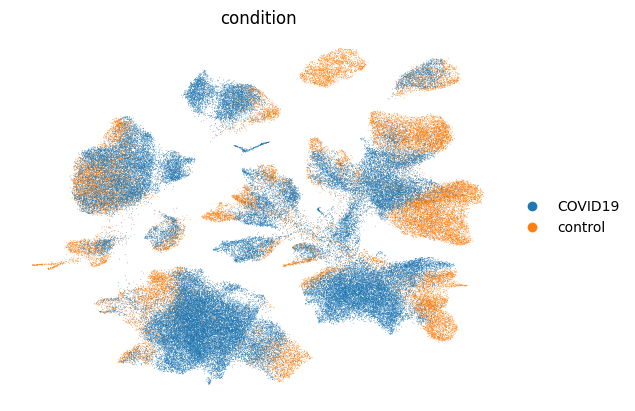

In [11]:
sc.pl.umap(adata, color = ['condition'], frameon = False)

In [12]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

{'C51ctr': 5960,
 'C52ctr': 4415,
 'C53ctr': 6928,
 'C54ctr': 4284,
 'C55ctr': 5565,
 'C56ctr': 3904,
 'C57ctr': 4687,
 'L01cov': 2952,
 'L03cov': 3953,
 'L04cov': 3401,
 'L04covaddon': 4386,
 'L05cov': 2696,
 'L06cov': 6306,
 'L07cov': 4753,
 'L08cov': 3767,
 'L09cov': 3368,
 'L10cov': 1501,
 'L11cov': 2888,
 'L12cov': 3648,
 'L13cov': 4732,
 'L15cov': 3905,
 'L16cov': 1773,
 'L17cov': 4341,
 'L18cov': 2633,
 'L19cov': 2429,
 'L21cov': 3257,
 'L22cov': 6390}

In [13]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

Sample condition          cell_type  doublet
0    C51ctr   control                AT1      832
1    C51ctr   control                AT2      771
2    C51ctr   control  Airway Epithelial      269
3    C51ctr   control            B Cells       39
4    C51ctr   control        CD4+ T-cell      967
..      ...       ...                ...      ...
441  L22cov   COVID19        Macrophages     1663
442  L22cov   COVID19          Monocytes      156
443  L22cov   COVID19            Neurons        8
444  L22cov   COVID19       Plasma Cells      539
445  L22cov   COVID19      Smooth Muscle       70

[446 rows x 4 columns]

In [14]:
cell_type_counts["Total_cells"] = cell_type_counts.Sample.map(num_tot_cells).astype(int)
cell_type_counts

Sample condition          cell_type  doublet  Total_cells
0    C51ctr   control                AT1      832         5960
1    C51ctr   control                AT2      771         5960
2    C51ctr   control  Airway Epithelial      269         5960
3    C51ctr   control            B Cells       39         5960
4    C51ctr   control        CD4+ T-cell      967         5960
..      ...       ...                ...      ...          ...
441  L22cov   COVID19        Macrophages     1663         6390
442  L22cov   COVID19          Monocytes      156         6390
443  L22cov   COVID19            Neurons        8         6390
444  L22cov   COVID19       Plasma Cells      539         6390
445  L22cov   COVID19      Smooth Muscle       70         6390

[446 rows x 5 columns]

In [15]:
#Creation of the frequency column
cell_type_counts['Frequency'] = cell_type_counts.doublet/cell_type_counts.Total_cells
cell_type_counts

Sample condition          cell_type  doublet  Total_cells  Frequency
0    C51ctr   control                AT1      832         5960   0.139597
1    C51ctr   control                AT2      771         5960   0.129362
2    C51ctr   control  Airway Epithelial      269         5960   0.045134
3    C51ctr   control            B Cells       39         5960   0.006544
4    C51ctr   control        CD4+ T-cell      967         5960   0.162248
..      ...       ...                ...      ...          ...        ...
441  L22cov   COVID19        Macrophages     1663         6390   0.260250
442  L22cov   COVID19          Monocytes      156         6390   0.024413
443  L22cov   COVID19            Neurons        8         6390   0.001252
444  L22cov   COVID19       Plasma Cells      539         6390   0.084351
445  L22cov   COVID19      Smooth Muscle       70         6390   0.010955

[446 rows x 6 columns]

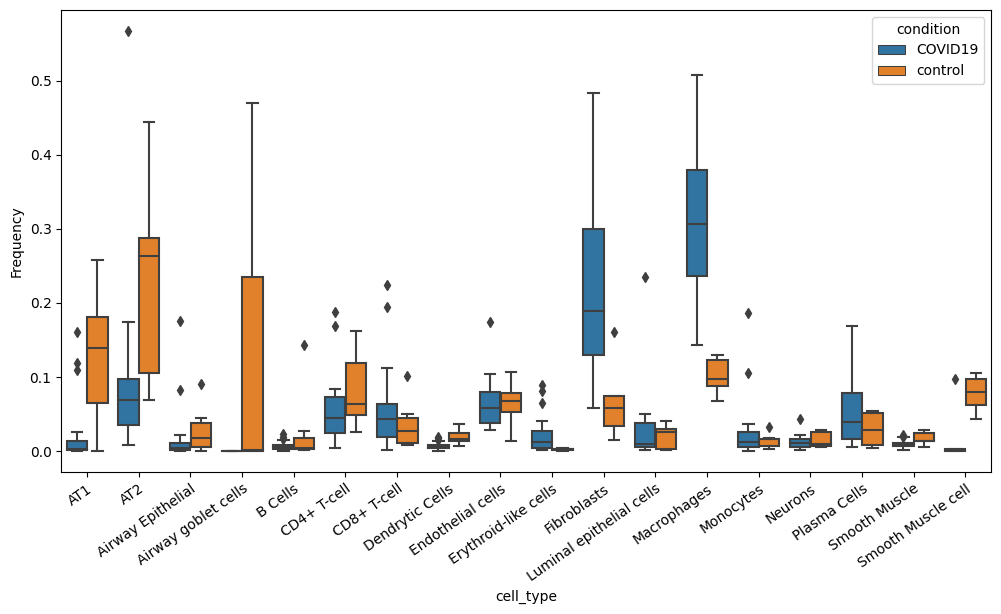

In [16]:
#Plotting Frequencies
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize= (12, 6))
ax = sns.boxplot(data=cell_type_counts, x = 'cell_type', y = 'Frequency', hue = 'condition')
plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')
plt.show()

# **Differential Expression PLots**

In [17]:
#subset = adata[adata.obs['cell_type'].isin(['AT1', 'AT2'])].copy()

In [18]:
model = scvi.model.SCVI.load('model.model', adata)

INFO     File model.model/model.pt already downloaded                                                              


In [29]:
#Analysis 1
scvi_de = model.differential_expression(
    idx1=[(adata.obs['cell_type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'COVID19')],
    idx2=[(adata.obs['cell_type'].isin(['AT1', 'AT2'])) & (adata.obs.condition == 'control')]
    )

DE...: 100%|██████████| 1/1 [00:06<00:00,  6.95s/it]


In [30]:
scvi_de

proba_de  proba_not_de  bayes_factor        scale1    scale2  \
IQCN          0.9840        0.0160      4.119037  1.210035e-05  0.000119   
AC008674.1    0.9796        0.0204      3.871609  2.798268e-06  0.000030   
AC134312.4    0.9792        0.0208      3.851782  7.223695e-07  0.000004   
LINC01811     0.9770        0.0230      3.748992  7.871351e-05  0.000331   
HIST1H2AC     0.9764        0.0236      3.722625  9.303429e-05  0.000028   
...              ...           ...           ...           ...       ...   
MARCH7        0.4034        0.5966     -0.391318  1.829847e-04  0.000171   
TRIP12        0.3962        0.6038     -0.421324  2.183371e-04  0.000214   
RNF10         0.3780        0.6220     -0.498046  8.600020e-05  0.000086   
RAF1          0.3682        0.6318     -0.539947  1.230414e-04  0.000116   
LRCH3         0.3396        0.6604     -0.665077  1.166465e-04  0.000114   

            pseudocounts  delta  lfc_mean  lfc_median   lfc_std    lfc_min  \
IQCN                 0.0   0.25 -3.206045   -3.189436  1.699656  -9.386394   
AC008674.1           0.0   0.25 -3.218567   -3.189779  1.872312 -12.590235   
AC134312.4           0.0   0.25 -2.420413   -2.376056  1.241908  -7.852570   
LINC01811            0.0   0.25 -0.533475   -1.433115  5.048503 -12.414543   
HIST1H2AC            0.0   0.25  1.909464    1.874585  1.078063  -2.628284   
...                  ...    ...       ...         ...       ...        ...   
MARCH7               0.0   0.25  0.084683    0.085487  0.291574  -1.476488   
TRIP12               0.0   0.25  0.031340    0.041385  0.299412  -1.130405   
RNF10                0.0   0.25  0.000256    0.003598  0.284185  -1.131934   
RAF1                 0.0   0.25  0.083869    0.075146  0.271685  -0.797865   
LRCH3                0.0   0.25  0.037494    0.046257  0.254192  -0.994506   

              lfc_max  raw_mean1  raw_mean2  non_zeros_proportion1  \
IQCN         4.189446   0.025456   0.194121               0.017953   
AC008674.1   4.647034   0.000938   0.015823               0.000938   
AC134312.4   2.242458   0.000402   0.001915               0.000402   
LINC01811   11.614929   0.015407   0.359258               0.008441   
HIST1H2AC    5.850424   0.163317   0.024900               0.103966   
...               ...        ...        ...                    ...   
MARCH7       1.172388   0.335216   0.260995               0.257637   
TRIP12       0.931876   0.430210   0.357507               0.313371   
RNF10        0.965940   0.164389   0.128330               0.146034   
RAF1         1.286441   0.261657   0.192623               0.215434   
LRCH3        0.818054   0.230707   0.184045               0.187165   

            non_zeros_proportion2  raw_normalized_mean1  raw_normalized_mean2  \
IQCN                     0.155396              0.155241              1.470861   
AC008674.1               0.012825              0.004302              0.120413   
AC134312.4               0.001832              0.000858              0.018417   
LINC01811                0.132162              0.097960              2.248363   
HIST1H2AC                0.019570              0.789717              0.166975   
...                           ...                   ...                   ...   
MARCH7                   0.214274              1.789404              1.687895   
TRIP12                   0.277732              2.243201              2.307317   
RNF10                    0.117089              0.899623              0.853763   
RAF1                     0.165889              1.470279              1.265572   
LRCH3                    0.155896              1.246309              1.185277   

            is_de_fdr_0.05  
IQCN                  True  
AC008674.1            True  
AC134312.4            True  
LINC01811             True  
HIST1H2AC             True  
...                    ...  
MARCH7               False  
TRIP12               False  
RNF10                False  
RAF1                 False  
LRCH3                False  


In [33]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

proba_de  proba_not_de  bayes_factor    scale1        scale2  \
AC008674.1    0.9796        0.0204      3.871609  0.000003  2.989930e-05   
IQCN          0.9840        0.0160      4.119037  0.000012  1.186855e-04   
AC011444.3    0.9706        0.0294      3.496919  0.000006  3.041653e-05   
AC245014.3    0.9600        0.0400      3.178054  0.000001  9.424396e-06   
AC253572.2    0.9488        0.0512      2.919458  0.000001  1.104657e-05   
...              ...           ...           ...       ...           ...   
CXCL14        0.9638        0.0362      3.281824  0.000011  1.727570e-06   
AC105402.3    0.9660        0.0340      3.346803  0.000300  1.507296e-05   
AC106786.1    0.9678        0.0322      3.403059  0.000003  3.576417e-07   
IFITM2        0.9744        0.0256      3.639229  0.000017  2.127944e-06   
RBFOX1        0.9690        0.0310      3.442277  0.000002  3.266172e-07   

            pseudocounts  delta  lfc_mean  lfc_median   lfc_std    lfc_min  \
AC008674.1           0.0   0.25 -3.218567   -3.189779  1.872312 -12.590235   
IQCN                 0.0   0.25 -3.206045   -3.189436  1.699656  -9.386394   
AC011444.3           0.0   0.25 -2.908235   -3.061579  1.713989  -7.479822   
AC245014.3           0.0   0.25 -2.884727   -2.897947  1.967862  -9.630416   
AC253572.2           0.0   0.25 -2.621284   -2.509362  1.904899  -9.469200   
...                  ...    ...       ...         ...       ...        ...   
CXCL14               0.0   0.25  3.175710    3.183718  2.814494  -9.889320   
AC105402.3           0.0   0.25  3.266474    3.245312  3.552385  -8.399711   
AC106786.1           0.0   0.25  3.332330    3.246559  2.416624  -4.464033   
IFITM2               0.0   0.25  3.645197    3.804929  2.667316  -8.410500   
RBFOX1               0.0   0.25  3.969052    4.109691  3.886943 -17.661644   

              lfc_max  raw_mean1  raw_mean2  non_zeros_proportion1  \
AC008674.1   4.647034   0.000938   0.015823               0.000938   
IQCN         4.189446   0.025456   0.194121               0.017953   
AC011444.3   4.721571   0.006565   0.040723               0.006029   
AC245014.3   4.620609   0.000402   0.015240               0.000402   
AC253572.2   3.699360   0.000938   0.020403               0.000938   
...               ...        ...        ...                    ...   
CXCL14      11.592437   0.024116   0.000416               0.014335   
AC105402.3  15.317940   0.442661   0.003831               0.102358   
AC106786.1  11.772032   0.005359   0.000083               0.005359   
IFITM2      11.375590   0.019561   0.000999               0.017149   
RBFOX1      17.168982   0.003483   0.000000               0.000134   

            non_zeros_proportion2  raw_normalized_mean1  raw_normalized_mean2  \
AC008674.1               0.012825              0.004302              0.120413   
IQCN                     0.155396              0.155241              1.470861   
AC011444.3               0.037808              0.042696              0.255837   
AC245014.3               0.014407              0.002557              0.094885   
AC253572.2               0.018488              0.006118              0.126778   
...                           ...                   ...                   ...   
CXCL14                   0.000416              0.089981              0.004817   
AC105402.3               0.002582              3.012200              0.026361   
AC106786.1               0.000083              0.027132              0.001230   
IFITM2                   0.000916              0.097536              0.006220   
RBFOX1                   0.000000              0.013741              0.000000   

            is_de_fdr_0.05  
AC008674.1            True  
IQCN                  True  
AC011444.3            True  
AC245014.3            True  
AC253572.2            True  
...                    ...  
CXCL14                True  
AC105402.3            True  
AC106786.1            True  
IFITM2                True  
RBFOX1                True  


In [36]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2 > .5)]
scvi_de

proba_de  proba_not_de  bayes_factor    scale1    scale2  \
IQCN          0.9840        0.0160      4.119037  0.000012  0.000119   
AC022217.3    0.9546        0.0454      3.045780  0.000017  0.000075   
FOSB          0.9442        0.0558      2.828564  0.000073  0.000526   
AC096564.1    0.9518        0.0482      2.982996  0.000087  0.000553   
AC016987.1    0.9598        0.0402      3.172858  0.000014  0.000100   
...              ...           ...           ...       ...       ...   
RPS28         0.9500        0.0500      2.944439  0.000123  0.000020   
SCD           0.9526        0.0474      3.000573  0.000178  0.000035   
DONSON        0.9682        0.0318      3.415972  0.000069  0.000013   
HSPA1B        0.9710        0.0290      3.511030  0.000056  0.000007   
AC105402.3    0.9660        0.0340      3.346803  0.000300  0.000015   

            pseudocounts  delta  lfc_mean  lfc_median   lfc_std    lfc_min  \
IQCN                 0.0   0.25 -3.206045   -3.189436  1.699656  -9.386394   
AC022217.3           0.0   0.25 -2.464208   -2.519437  1.978515  -8.380823   
FOSB                 0.0   0.25 -2.402496   -2.194742  2.002137  -9.363764   
AC096564.1           0.0   0.25 -2.399808   -2.400691  2.104148  -9.040825   
AC016987.1           0.0   0.25 -2.195555   -2.514969  2.969696 -11.749841   
...                  ...    ...       ...         ...       ...        ...   
RPS28                0.0   0.25  2.546712    2.545298  2.083264  -4.844960   
SCD                  0.0   0.25  2.698900    2.685445  2.644131  -5.509456   
DONSON               0.0   0.25  2.971552    2.858227  1.978201  -3.175983   
HSPA1B               0.0   0.25  3.056414    2.957702  2.052839  -3.457787   
AC105402.3           0.0   0.25  3.266474    3.245312  3.552385  -8.399711   

              lfc_max  raw_mean1  raw_mean2  non_zeros_proportion1  \
IQCN         4.189446   0.025456   0.194121               0.017953   
AC022217.3   5.716095   0.040059   0.161143               0.032958   
FOSB         3.922318   0.017685   0.602840               0.012594   
AC096564.1   5.165107   0.148982   0.939778               0.111334   
AC016987.1   7.242315   0.009244   0.129247               0.007637   
...               ...        ...        ...                    ...   
RPS28        9.530138   0.185959   0.004580               0.115354   
SCD          9.920317   0.326370   0.031063               0.188103   
DONSON       9.463050   0.129153   0.004081               0.114416   
HSPA1B      10.694741   0.118033   0.005996               0.084405   
AC105402.3  15.317940   0.442661   0.003831               0.102358   

            non_zeros_proportion2  raw_normalized_mean1  raw_normalized_mean2  \
IQCN                     0.155396              0.155241              1.470861   
AC022217.3               0.127831              0.211439              1.106121   
FOSB                     0.269071              0.111496              4.491234   
AC096564.1               0.318288              0.774480              5.239348   
AC016987.1               0.093854              0.052840              0.813302   
...                           ...                   ...                   ...   
RPS28                    0.003165              0.911597              0.021276   
SCD                      0.023318              1.713346              0.156880   
DONSON                   0.003914              0.659542              0.014449   
HSPA1B                   0.005080              0.686107              0.039492   
AC105402.3               0.002582              3.012200              0.026361   

            is_de_fdr_0.05  
IQCN                  True  
AC022217.3            True  
FOSB                  True  
AC096564.1            True  
AC016987.1            True  
...                    ...  
RPS28                 True  
SCD                   True  
DONSON                True  
HSPA1B                True  
AC105402.3            True  

[133 rows x 19 columns]

In [37]:
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist()

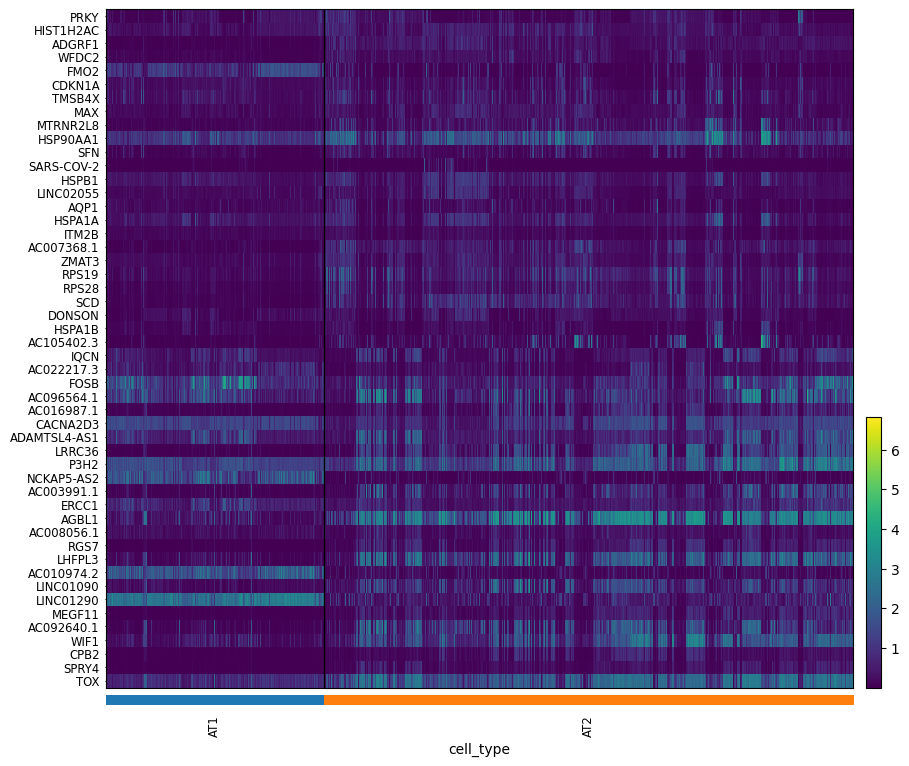

In [38]:
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer = 'scvi_normalized',
              log = True)

In [45]:
adata

AnnData object with n_obs × n_vars = 108822 × 21306
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type', 'condition'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap', 'condition_colors'
    obsm: 'X_scvi', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'